# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

#### Business Problem  
Flight delays cause significant inconvenience to customers and financial losses to airlines and travel platforms. Our travel booking website aims to improve the customer experience by proactively notifying users if their booked flight is likely to be delayed due to weather conditions. This would enable customers to make informed choices and reduce frustration at airports.

#### Business Goal  
The goal is to develop a predictive system that identifies flights likely to be delayed due to weather, enabling the platform to alert customers before travel.  

**Target business metrics:**  
- **Reduce customer delay complaints by 15%** within the first six months of feature deployment.  
- **Increase user satisfaction scores by 10%** as measured through post-booking surveys.

#### Machine Learning Problem Statement  
Formulate a supervised binary classification problem to predict whether a given flight will be “Delayed due to weather” (Yes/No) using features such as departure time, origin and destination airports, date, airline, and historical weather data. The model will be trained on historical flight performance data (2014–2018) provided by the Bureau of Transportation Statistics (BTS).

#### Why Machine Learning?  
Traditional rule-based systems cannot effectively model the complex, non-linear relationships between weather patterns, geography, and flight operations. Machine learning enables data-driven predictions based on patterns learned from large amounts of historical data.

#### Type of Machine Learning  
This is a supervised learning problem focused on classification, where the model learns from labeled historical data to predict whether a flight will be delayed or not.


### 2. Formulate the business problem, success metrics, and desired ML output.

#### Business Problem  
Flight delays—particularly those caused by weather—create negative customer experiences and can lead to reputational and financial losses for airlines and booking platforms. The company wants to predict whether a scheduled flight will be delayed due to weather so customers can make better-informed travel decisions when booking.

#### Success Metrics  
To evaluate the success of this initiative, both business and technical metrics will be used:

**Business Metrics:**  
- Reduce customer delay complaints by 15% within six months of deployment.  
- Improve customer satisfaction (CSAT) scores related to flight information accuracy by 10%.  
- Decrease refund and rescheduling requests by 10%.

**Model Performance Metrics:**  
- **Precision**: Ensure that at least 80% of flights predicted as delayed are truly delayed (to avoid false alarms).  
- **Recall**: Aim for 85% recall to correctly identify most delay events.  
- **F1 Score**: Optimize the balance between precision and recall.  
- **AUC-ROC**: Evaluate model discrimination between delayed and non-delayed flights.

#### Desired Machine Learning Output  
The machine learning model should output a binary classification label:  
- **1 (Yes)** → Flight is likely to be delayed due to weather.  
- **0 (No)** → Flight is likely to depart on time.

Optionally, the model may also produce a probability score (0–1) indicating the likelihood of a weather-related delay. This allows the business to set a threshold (e.g., only warn customers if probability > 0.7) depending on their tolerance for false positives.

#### Summary  
This model’s outcome will directly feed into the booking platform to provide real-time predictive alerts for users, enabling proactive communication and improving customer trust while optimizing operational decision-making for the company.

### 3. Identify the type of ML problem you’re dealing with.

This project represents a supervised learning problem because we are training a model on historical flight data where the outcome (delayed due to weather or not) is already known. The model learns patterns from these labeled examples to predict outcomes for new, unseen flights.

#### Type of Problem  
- **Category:** Supervised Learning  
- **Task:** Classification  
- **Output Variable:** Binary (0 = Not Delayed, 1 = Delayed due to weather)

#### Explanation  
The goal is to predict a categorical label—whether a flight will be delayed or not—based on a range of input features such as:
- Date and time of departure  
- Origin and destination airports  
- Airline and flight distance  
- Historical and forecasted weather conditions  

Since the output variable is discrete (Yes/No), this is a binary classification task.  
If the objective were to predict the exact number of minutes of delay instead, it would become a regression problem; however, in this scenario, we are only interested in the likelihood of delay, not its duration.

#### Examples of Suitable Algorithms  
- Logistic Regression  
- Random Forest Classifier  
- Gradient Boosted Trees (e.g., XGBoost)  
- Support Vector Machines (SVM)

The model will ultimately be evaluated using classification metrics such as accuracy, precision, recall, and AUC-ROC to ensure balanced predictive performance.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [66]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [59]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data/data_compressed'
base_path = '.'
csv_base_path = 'data/data_uncompressed'
combined_df_path = 'data/data_combined'

!mkdir -p {csv_base_path}

The syntax of the command is incorrect.


In [4]:
# How many zip files do we have? write a code to answer it.
zip_files = [os.path.join(zip_path, f) for f in os.listdir(zip_path) if f.lower().endswith(".zip")]

# Print results
print(f"Number of ZIP files found: {len(zip_files)}")

Number of ZIP files found: 60


#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting data/data_compressed\On_Time_Reporting_Carrier_On_Time_Perf

In [6]:
# How many csv files have we extracted? write a code to answer it.
# Recursively find all CSV files in the folder
csv_files = [
    os.path.join(root, file)
    for root, _, files in os.walk(csv_base_path)
    for file in files if file.lower().endswith(".csv")
]

print(f"Number of CSV files extracted: {len(csv_files)}")

Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [13]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [9]:
df_temp = pd.read_csv('data/data_uncompressed/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv') # **ENTER YOUR CODE HERE**

**Question**: Print the row and column length in the dataset, and print the column names.

In [15]:
df_shape = df_temp.shape
print(f"Rows and columns in one CSV file: {df_shape}")

# Print column names
print("\nColumn names:")
print(df_temp.columns.tolist())

Rows and columns in one CSV file: (471949, 110)

Column names:
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Secur

**Question**: Print the first 10 rows of the dataset.  

In [11]:
# Enter your code here
display(df_temp.head(10))

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,1,1,30,4,2014-01-30,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,1,1,4,6,2014-01-04,AA,19805,AA,N010AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,1,1,5,7,2014-01-05,AA,19805,AA,N011AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,1,1,6,1,2014-01-06,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,1,1,7,2,2014-01-07,AA,19805,AA,N012AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,8,3,2014-01-08,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [16]:
print('The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [17]:
# Enter your code here
# Find columns containing the word 'Del'
del_columns = [col for col in df_temp.columns if 'Del' in col]

print("Columns containing 'Del':")
print('#########')
for col in del_columns:
    print(col)

Columns containing 'Del':
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [22]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp['Year'].unique().tolist())
print("The months covered in this dataset are: ", df_temp['Month'].unique().tolist())
print("The date range for data is :", df_temp['FlightDate'].min(), " to ", df_temp['FlightDate'].max())
print("The airlines covered in this dataset are: ", df_temp['Reporting_Airline'].unique().tolist())
print("The Origin airports covered are: ", df_temp['Origin'].unique().tolist())
print("The Destination airports covered are: ", df_temp['Dest'].unique().tolist())

The #rows and #columns are  471949  and  110
The years in this dataset are:  [2014]
The months covered in this dataset are:  [1]
The date range for data is : 2014-01-01  to  2014-01-31
The airlines covered in this dataset are:  ['AA', 'AS', 'DL', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', 'US', 'OO', 'VX', 'WN', 'UA']
The Origin airports covered are:  ['DFW', 'ICT', 'MIA', 'BLI', 'PDX', 'OGG', 'OAK', 'SMF', 'KOA', 'HNL', 'SJC', 'SEA', 'SAN', 'LIH', 'ANC', 'DCA', 'EWR', 'LAX', 'MCO', 'BOS', 'ORD', 'FLL', 'MSP', 'PHL', 'BET', 'ADQ', 'SCC', 'BRW', 'FAI', 'KTN', 'JNU', 'CDV', 'YAK', 'SIT', 'PSG', 'WRG', 'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS', 'TUS', 'AUS', 'DEN', 'SAT', 'GEG', 'SLC', 'IAH', 'ATL', 'STL', 'MCI', 'ADK', 'CVG', 'BOI', 'VPS', 'SDF', 'PBI', 'LGA', 'JFK', 'CHS', 'BNA', 'BTR', 'BHM', 'ECP', 'TPA', 'RSW', 'DTW', 'BWI', 'CAE', 'MKE', 'CLE', 'CMH', 'MEM', 'ALB', 'COS', 'MSN', 'BDL', 'FSD', 'GSP', 'JAN', 'PNS', 'FAY', 'CLT', 'HRL', 'IAD', 'AGS', 'BUF', 'DAY', 'LIT', '

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [24]:
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})
counts

,Origin,Destination
ABE,135,137
ABI,243,244
ABQ,1910,1909
ABR,62,62
ABY,89,89
...,...,...
VPS,402,401
WRG,62,62
XNA,826,831
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [25]:
counts.sort_values(by='Origin', ascending=False).head(15)

,Origin,Destination
ATL,30796,30784
DFW,23488,23482
ORD,21497,21529
LAX,18481,18474
DEN,17977,17955
IAH,14581,14569
SFO,13550,13539
PHX,13343,13335
LAS,11050,11052
CLT,9768,9777


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes — based on the features provided in the dataset, it is feasible to **predict whether a flight will be delayed**.  
The dataset includes a rich set of attributes such as:

- **Temporal features** — Year, Month, DayOfWeek, FlightDate, CRSDepTime, CRSArrTime  
- **Flight identifiers** — Reporting_Airline, Flight_Number_Reporting_Airline, Tail_Number  
- **Route information** — Origin, Destination, Distance  
- **Operational details** — TaxiOut, AirTime, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay  

Using these variables, a **supervised machine learning model** (e.g., Logistic Regression, Random Forest, or Gradient Boosted Trees) can learn the patterns that typically lead to flight delays.  

The target variable would be **binary** (e.g., `Delayed` = 1 if the flight’s arrival or departure delay exceeds 15 minutes, otherwise 0).  
Thus, the problem is a **classification task** — predicting the likelihood that a scheduled flight will experience a delay.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [26]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()

    # Loop through each CSV file
    for file in csv_files:
        try:
            temp_df = pd.read_csv(file, usecols=filter_cols, low_memory=False)
            
            # Filter the subset columns (like top airports and airlines)
            for col, vals in zip(subset_cols, subset_vals):
                temp_df = temp_df[temp_df[col].isin(vals)]
            
            # Concatenate to master dataframe
            df = pd.concat([df, temp_df], ignore_index=True)
            
            print(f"Loaded and filtered: {file}")
        except Exception as e:
            print(f"Failed to process {file}: {e}")
    
    # Save combined dataframe to a CSV file
    df.to_csv(file_name, index=False)
    print(f"\nCombined data saved as {file_name}")

In [28]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [32]:
start = time.time()

combined_csv_filename = f"{combined_df_path}/combined_files.csv"

# Call the combine_csv function
combined_df = combine_csv(
    csv_files=csv_files,
    filter_cols=cols,
    subset_cols=subset_cols,
    subset_vals=subset_vals,
    file_name=combined_csv_filename
)

print(f"csv's merged in {round((time.time() - start)/60, 2)} minutes")

Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv
Loaded and filtered: data/data_uncompressed\On_Time_Reporting_Carrier

#### Load dataset

Load the combined dataset.

In [33]:
data = pd.read_csv('data/data_combined/combined_files.csv')# Enter your code here to read the combined csv file.

Print the first 5 records.

In [34]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,AirTime,Distance,DistanceGroup
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,TX,2145,-20.0,0.0,0.0,0.0,0.0,99.0,689.0,3
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,GA,945,-3.0,0.0,0.0,0.0,0.0,98.0,731.0,3
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,CO,1855,-7.0,0.0,0.0,0.0,0.0,174.0,1199.0,5
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,AZ,1634,-4.0,0.0,0.0,0.0,0.0,233.0,1587.0,7
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,GA,700,-13.0,0.0,0.0,0.0,0.0,179.0,1587.0,7


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [38]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :", data['FlightDate'].min(), " to ", data['FlightDate'].max())
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [39]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [41]:
# Check for missing values in each column
null_counts = data.isnull().sum(axis=0)

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [42]:
### Remove null columns
data = data[~data['ArrDelayMinutes'].isnull() & ~data['AirTime'].isnull()]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [43]:
data['DepHourofDay'] = data['CRSDepTime'] // 100
print(data[['CRSDepTime', 'DepHourofDay']].head())

   CRSDepTime  DepHourofDay
0        2145            21
1         945             9
2        1855            18
3        1634            16
4         700             7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

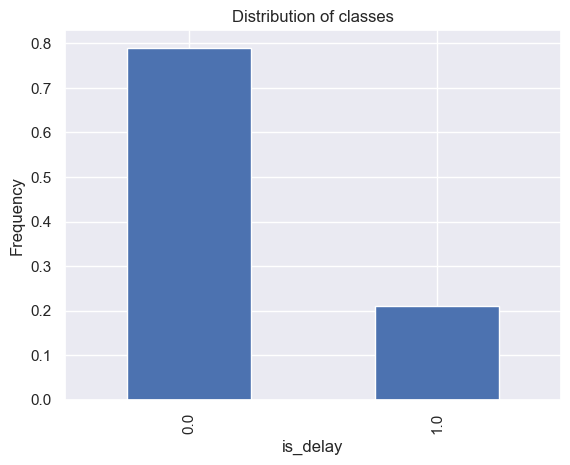

In [44]:
(data.groupby('is_delay').size() / len(data)).plot(kind='bar') # Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot shows that the dataset is imbalanced — the majority of flights (around 80%) are on time (no delay), while only about 20% of flights are delayed by more than 15 minutes.

This class imbalance indicates that:
- The no-delay (0) class dominates the dataset.
- A naïve model predicting “no delay” for all flights could achieve high accuracy but poor recall for the delayed class.
- During model training, it will be important to use techniques such as class weighting, resampling (e.g., SMOTE or undersampling), or evaluation metrics like F1-score, Precision-Recall, or ROC-AUC to ensure balanced performance across both classes.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

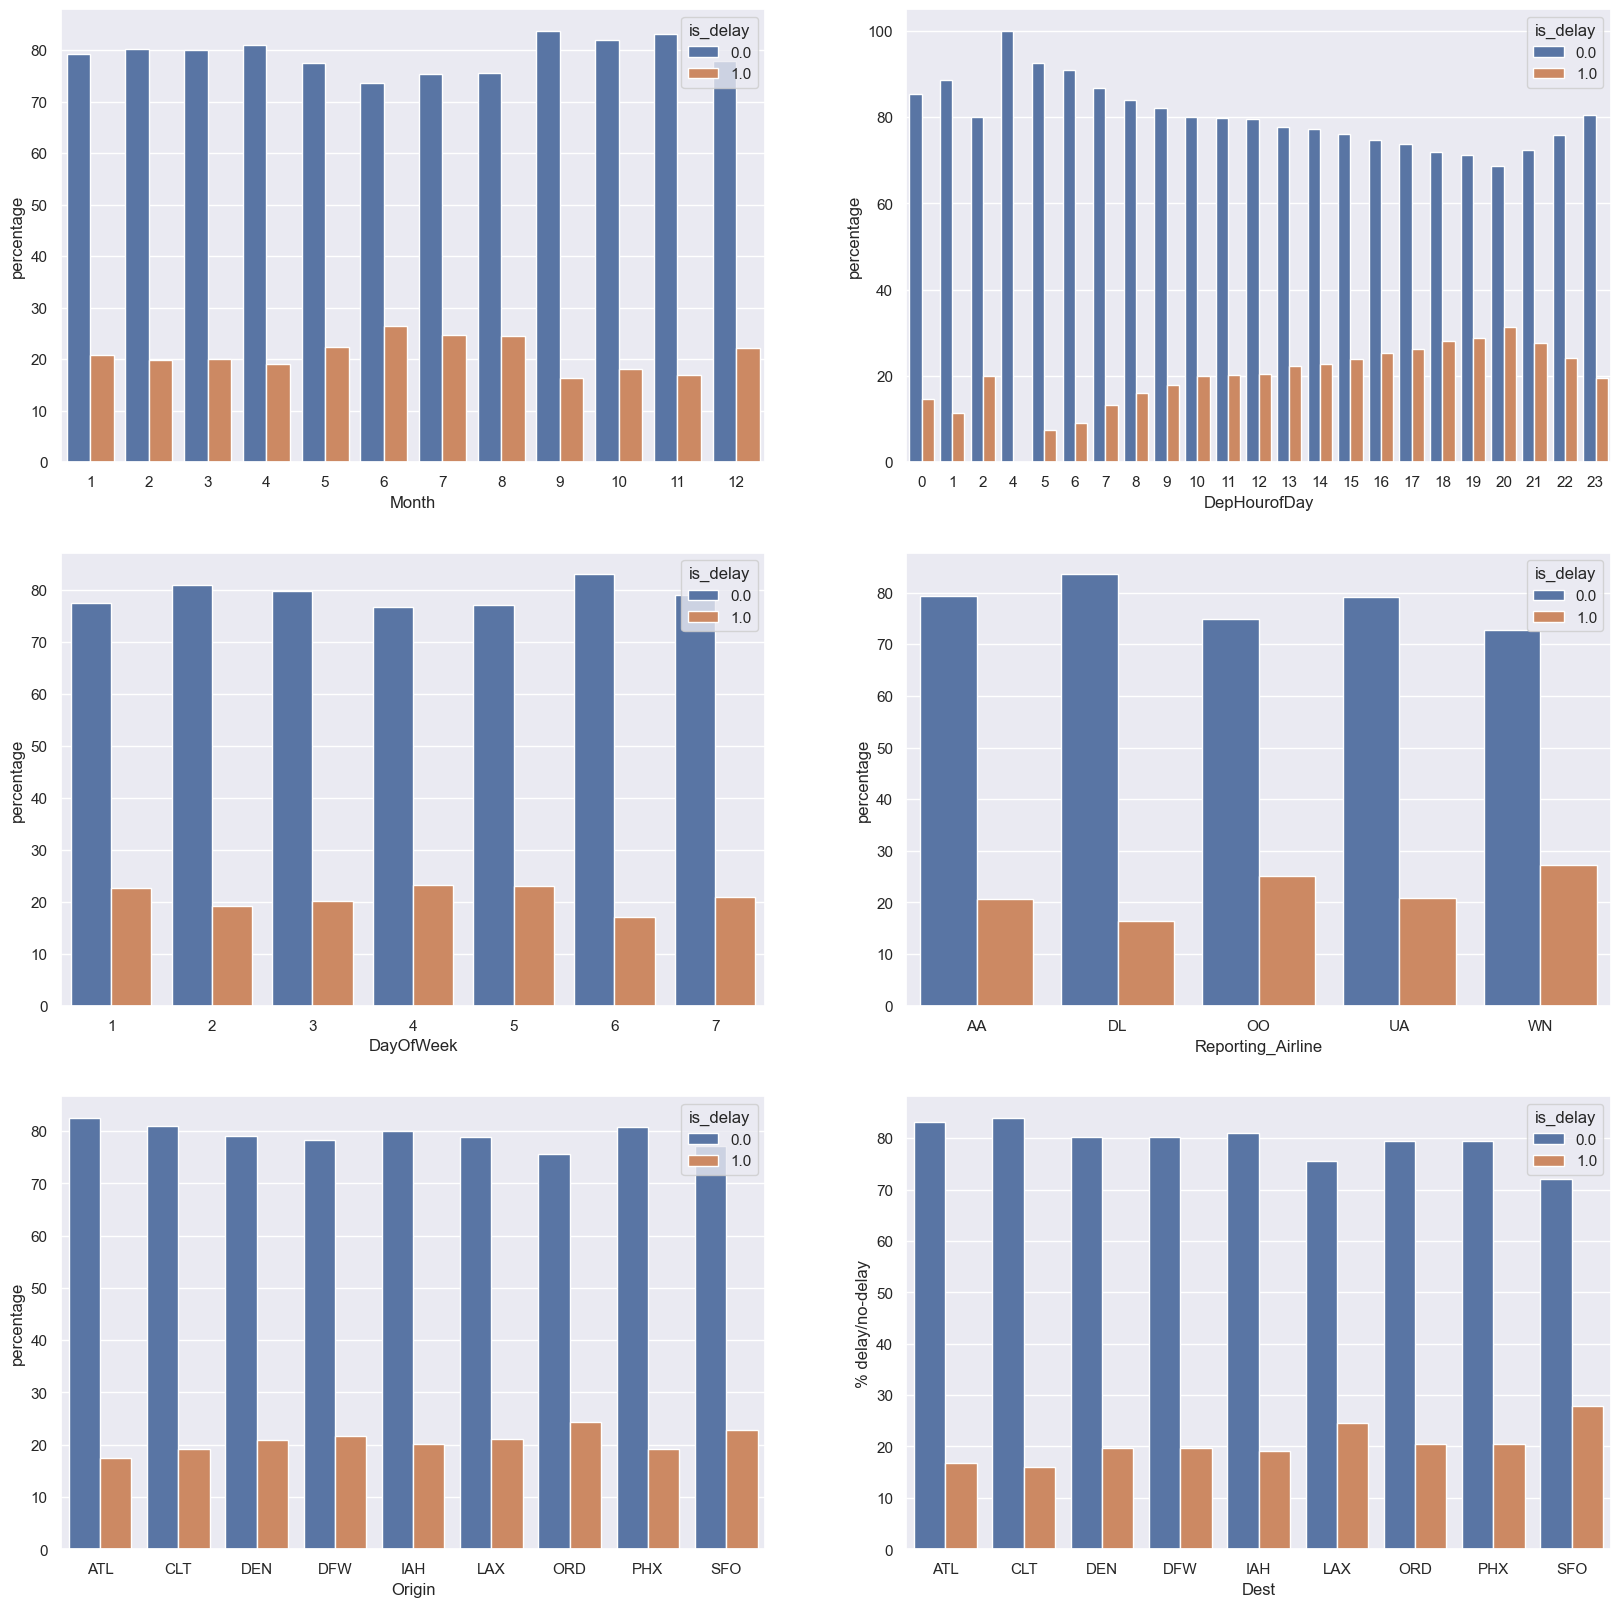

In [45]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

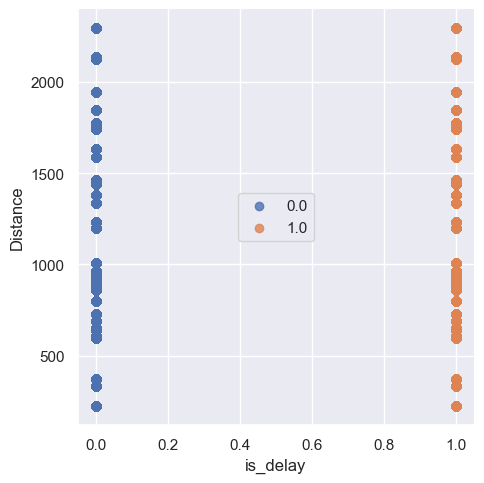

In [46]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

#### 1. Which months have the most delays?
- Delays occur throughout the year with a fairly consistent proportion across months.  
- Slightly higher delay frequencies appear around summer months (June–August) and December, which could correspond to busy travel seasons and weather-related issues.

#### 2. What time of the day has the most delays?
- The early morning flights (around 5–8 AM) have the lowest delay rates, likely because the aircraft are already positioned from the night before.  
- Delays increase through the afternoon and evening, peaking between 4 PM and 8 PM, as cumulative operational delays and air traffic congestion build up during the day.

#### 3. What day of the week has the most delays?
- The delay distribution is relatively consistent across all days, though Fridays and Sundays show a slightly higher proportion of delays, likely due to increased passenger volume and end-of-week travel demand.

#### 4. Which airline has the most delays?
- Based on the plot, OO (SkyWest Airlines) and WN (Southwest Airlines) show higher delay proportions, while DL (Delta) and UA (United) tend to have slightly better on-time performance.  
- This could be due to differences in hub congestion, fleet scheduling, or route networks.

#### 5. Which origin and destination airports have the most delays?
- SFO (San Francisco International) and LAX (Los Angeles International) exhibit more frequent delays, consistent with their heavy air traffic and weather variability (fog, coastal winds).  
- ATL (Atlanta) and DFW (Dallas–Fort Worth) perform slightly better, reflecting efficient hub operations despite high volumes.

#### 6. Is flight distance a factor in the delays?
- The scatter plot shows no strong correlation between flight distance and delay occurrence.  
- Both short- and long-haul flights experience delays, indicating that operational factors (e.g., scheduling, congestion, weather) play a bigger role than route length.

### Features

Look at all the columns and what their specific types are.

In [47]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [48]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
Cancelled            float64
Diverted             float64
AirTime              float64
Distance             float64
DistanceGroup          int64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [49]:
data_orig = data.copy()
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
             'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
                       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [50]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [55]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (1635590, 94)


In [56]:
print(data.columns.tolist())

['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO', 'Dest_CLT', 

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [57]:
data.rename(columns={'is_delay': 'target'}, inplace=True) # Enter your code here

In [60]:
data.to_csv(f"{combined_df_path}/combined_csv_v1.csv", index=False)
print("combined_csv_v1.csv has been saved successfully.")

combined_csv_v1.csv has been saved successfully.


In [76]:
data.head()

,target,Distance,Quarter_2,Quarter_3,Quarter_4,Month_2,Month_3,Month_4,Month_5,Month_6,...,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
0,0.0,689.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.0,731.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1199.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,0.0,1587.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [84]:
# write Code here to split data into train, validate and test
train, test_and_validate = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])
test, validate = train_test_split(test_and_validate, test_size=0.5, random_state=42, stratify=test_and_validate['target'])

print("Data successfully split:")
print(f"Training set: {train.shape}")
print(f"Validation set:  {validate.shape}")
print(f"Testing set:  {test.shape}")

Data successfully split:
Training set: (1308472, 94)
Validation set:  (163559, 94)
Testing set:  (163559, 94)


### Baseline classification model

In [89]:
# <write code here>
# Separate features and labels for each dataset
X_train, y_train = train.drop('target', axis=1), train['target']
X_validate, y_validate = validate.drop('target', axis=1), validate['target']
X_test, y_test = test.drop('target', axis=1), test['target']

# Initialize and train baseline Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# ---- Training set predictions ----
train_pred = baseline_model.predict(X_train)

print("Training Set Evaluation")
print(f"Accuracy (Train): {accuracy_score(y_train, train_pred):.4f}")
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, train_pred))
print("\nClassification Report (Train):\n", classification_report(y_train, train_pred))

# ---- Test set predictions ----
test_labels = y_test
target_predicted = baseline_model.predict(X_test)

print("\nTest Set Evaluation")
print(f"Accuracy (Test): {accuracy_score(test_labels, target_predicted):.4f}")
print("\nConfusion Matrix (Test):\n", confusion_matrix(test_labels, target_predicted))
print("\nClassification Report (Test):\n", classification_report(test_labels, target_predicted))

Training Set Evaluation
Accuracy (Train): 0.7902

Confusion Matrix (Train):
 [[1033069     737]
 [ 273754     912]]

Classification Report (Train):
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88   1033806
         1.0       0.55      0.00      0.01    274666

    accuracy                           0.79   1308472
   macro avg       0.67      0.50      0.44   1308472
weighted avg       0.74      0.79      0.70   1308472


Test Set Evaluation
Accuracy (Test): 0.7902

Confusion Matrix (Test):
 [[129131     95]
 [ 34213    120]]

Classification Report (Test):
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    129226
         1.0       0.56      0.00      0.01     34333

    accuracy                           0.79    163559
   macro avg       0.67      0.50      0.44    163559
weighted avg       0.74      0.79      0.70    163559



## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [69]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    """
    Plots a labeled confusion matrix for classification results.
    """
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Delay (0)', 'Delay (1)'],
                yticklabels=['No Delay (0)', 'Delay (1)'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [74]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    # complete the code here
    """
    Plots the Receiver Operating Characteristic (ROC) curve for a binary classifier.
    """
    # Get predicted probabilities for the positive class (1 = delayed)
    fpr, tpr, thresholds = metrics.roc_curve(test_labels, target_predicted)
    auc = metrics.roc_auc_score(test_labels, target_predicted)

    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random chance line
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

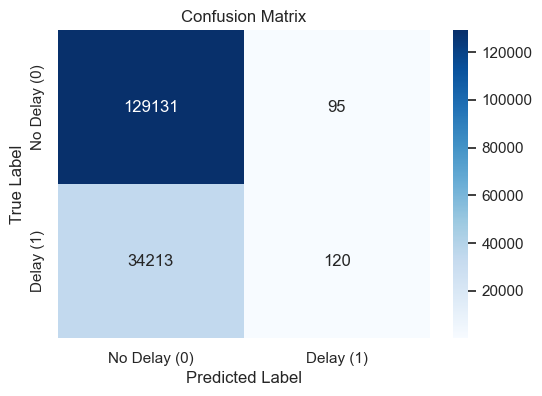

In [87]:
plot_confusion_matrix(test_labels, target_predicted)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

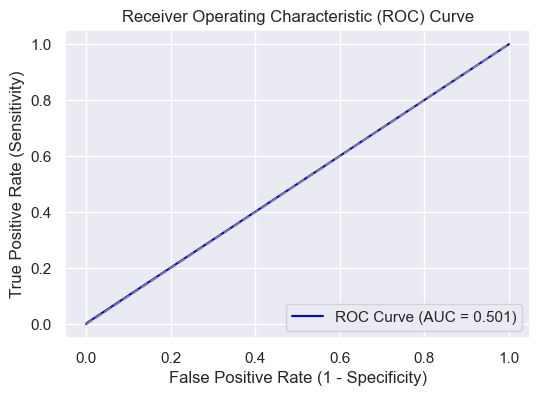

In [90]:
plot_roc(test_labels, target_predicted)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


From the confusion matrices for both the training and test sets, it’s clear that the model is predicting almost all flights as on time (class 0):

- **True Negatives (TN):** Very high — the model correctly identifies most on-time flights.  
- **False Negatives (FN):** Extremely high — almost all actual delays are being predicted as on time.  
- **True Positives (TP):** Very low — the model rarely identifies delayed flights correctly.  
- **False Positives (FP):** Minimal — very few on-time flights are incorrectly predicted as delayed.  

This pattern indicates that the model is biased toward the majority class (on-time flights).  
While it achieves a high overall accuracy (~79%), this is misleading because of the severe class imbalance — delayed flights make up only a small fraction of the data.

From a business perspective:
- The model currently has no practical utility — it fails to warn customers about real delays.  
- Recall = 0.00 for delayed flights means it captures none of the events the business actually cares about.  

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


In [ ]:
### Provide a link for your GitHub repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [ ]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = # Enter your code here 

Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [ ]:
weather = pd.read_csv(<CODE>) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = # Enter your code here 
weather['airport'] = # Enter your code here 

Create another column called `MONTH` from the `DATE` column.

In [ ]:
weather['MONTH'] = weather[<CODE>].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [ ]:
weather.SNOW.fillna(<CODE>, inplace=True)# Enter your code here
weather.SNWD.fillna(<CODE>, inplace=True)# Enter your code here
weather.isna().sum()

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [ ]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = # Enter your code here 
TMAX_idx = # Enter your code here 
TMIN_idx = # Enter your code here 
TAVG_idx

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [ ]:
weather_impute = weather.groupby([<CODE>]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

Merge the mean data with the weather data.

In [ ]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [ ]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [ ]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [ ]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [ ]:
sum(data.isna().any())

In [ ]:
data_orig.columns

Convert the categorical data into numerical data using one-hot encoding.

In [ ]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [ ]:
data_dummies = # Enter your code here

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [ ]:
data.columns

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [ ]:
data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here

In [16]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

Create the training and testing sets again.

In [ ]:
# Enter your code here

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Instantiate another logistic regression model
classifier2 = # Enter your code here

In [ ]:
# Enter your code here

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [18]:
# write your answers here